# Train & Test Data Preparation

Point Cloud NN requires data in the following scheme:

dataset

--- class1  

    --- train  
        * file.off
        * file.off
    
    --- test 
        * file.off
        * file.off
    

--- class2  

    --- train 
        * file.off
        * file.off
    
    --- test  
        * file.off
        * file.off

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("../data/time_data.csv")

In [142]:
SIZE = 200

In [3]:
data.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label,group
0,321.0,5.0,-17.661,32.245,65.231,-0.460,-0.266,-0.847,26.0,0.0,0,0
1,1653.0,23.0,11.595,85.465,65.459,-0.955,-0.000,0.296,27.0,0.0,0,0
2,275.0,9.0,-36.464,67.166,160.189,0.415,0.720,-0.556,26.0,0.0,0,0
3,1660.0,23.0,61.660,101.635,169.059,-0.955,-0.000,0.296,26.0,0.0,0,0
4,966.0,16.0,-54.510,-78.323,94.341,-0.827,0.478,-0.296,24.0,0.0,0,0


In [4]:
len(data)

45820216

Need:
1. Timeslices with only noise
2. Timeslices with noise + hits

### It would be good to know how many groups have only noise and noise + hits

In [5]:
df_count_label_type = data.groupby('group')['label'].unique()
df_count_label_type = pd.DataFrame(df_count_label_type)
df_count_label_type = df_count_label_type.reset_index()

Now we separate the groups by those that have only one label and those that have two lables (irrespective of lables)

In [6]:
df_count_label_type[:10]

,group,label
0,0,[0]
1,1,"[0, 1]"
2,2,"[0, 1]"
3,3,[0]
4,4,[0]
5,5,"[0, 1]"
6,6,"[0, 1]"
7,7,"[0, 1]"
8,8,[0]
9,9,"[0, 1]"


In [7]:
df_noise_hits = df_count_label_type.loc[np.array(
    list(map(len, df_count_label_type.label.values))) > 1]

In [8]:
df_noise_hits.head()

,group,label
1,1,"[0, 1]"
2,2,"[0, 1]"
5,5,"[0, 1]"
6,6,"[0, 1]"
7,7,"[0, 1]"


In [9]:
df_noise = df_count_label_type.loc[np.array(
    list(map(len, df_count_label_type.label.values))) == 1]

df_noise.head()

,group,label
0,0,[0]
3,3,[0]
4,4,[0]
8,8,[0]
10,10,[0]


Check to see if there are any groups that have just hits.

In [10]:
df_noise.label = df_noise.label.astype(int)
df_noise.label.unique()

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([0])

Now we have a list of groups that have only noise and groups that have both noise and hits. We need to obtain the corresponding full rows for each

# Timeslices with Only Noise

Obtain the df groups that only contain noise and arrange by highest to lowest members.

In [ ]:
df_noise.group
data_noise = data[data.group.isin(df_noise.group)]

In [ ]:
data_noise.head()

We can see that the mean size of groups with just noise is 6587 and the lowest have just 1 member. 

In [ ]:
data_noise.groupby('group')['label'].count().sort_values(ascending=False).describe()

Obtain the top groups and get their group ids as a list

In [ ]:
list_noise_groups = data_noise.groupby('group')['label'].count().sort_values(ascending=False)[:200]
list_noise_groups = list(list_noise_groups.index)

In [ ]:
data_path = "../data/points/noise/"

for idx in list_noise_groups:
    file_name = "group_"+str(idx)+".xyz"
    np.savetxt(data_path + file_name,
               data_noise[data_noise.group == idx][['pos_x', 'pos_y', 'pos_z']].values)
    
print("All {0} files saved successfully in {1}!".format(len(list_noise_groups),
                                                      data_path))

# Timeslices with Noise and HIts
Obtain the df groups that only contain noise and hits and arrange by highest to lowest members.

In [11]:
data_noise_hits = data[data.group.isin(df_noise_hits.group)]

In [12]:
data_noise_hits.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label,group
12454,485.0,17.0,-73.568,30.247,47.241,-0.827,-0.478,-0.296,27.0,15001.0,0,1
12455,618.0,31.0,12.056,13.517,151.011,0.719,-0.415,0.558,28.0,15003.0,0,1
12456,1011.0,4.0,-26.602,-94.884,178.231,-0.460,0.266,-0.847,28.0,15009.0,0,1
12457,1720.0,19.0,2.695,104.221,112.441,0.827,-0.478,-0.296,25.0,15011.0,0,1
12458,1442.0,31.0,88.235,50.983,187.211,0.719,-0.415,0.558,28.0,15017.0,0,1


We can see that the mean size of groups with just noise is 6587 and the lowest have just 1 member. 

In [13]:
data_noise_hits.groupby('group')['label'].count().sort_values(ascending=False).describe()

count    3976.000000
mean     6912.976861
std       200.590617
min      6550.000000
25%      6788.000000
50%      6869.000000
75%      6975.000000
max      8542.000000
Name: label, dtype: float64

### Class Imbalance

In [104]:
class_imbalance = data_noise_hits.groupby(['group', 'label'])['label'].count()[:20]
class_imbalance.head()

group  label
1      0        6728
       1         188
2      0        6803
       1           2
5      0        6776
Name: label, dtype: int64

In [143]:
neg, pos = np.bincount(data_noise_hits['label'])
total = neg + pos

hits = data_noise_hits[data_noise_hits.label == 1].groupby(['group', 'label'])['label']
noise = data_noise_hits[data_noise_hits.label == 0].groupby(['group', 'label'])['label']

hits_count = hits.count().sort_values(ascending=False)[:SIZE]
noise_count = noise.count().sort_values(ascending=False)[:SIZE]

hits_to_noise = hits_count.droplevel(level='label')/noise_count.droplevel(level='label')

print('Examples:\n Total: {}\n Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

print('Hits Only:\n The largest hits for a group: {}\n The smallest hits for a group: {}\n The mean hits for a group: {}\n'.format(hits_count.max(),
                                                                                                                                    hits_count.min(),
                                                                                                                                    hits_count.mean()))
      

print('Noise Only:\n The largest noise for a group: {}\n The smallest noise for a group: {}\n The mean noise for a group: {}\n'.format(noise_count.max(),
                                                                                                                                         noise_count.min(),
                                                                                                                                         noise_count.mean()))


print('Hits-Noise Ratio:\n The highest ratio: {:.2f}% ({})\n The smallest ratio: {:.2f}% ({}) \n The mean ratio: {:.2f}% ({})\n'.format(hits_to_noise.max()*100,
                                                                                                                                        hits_to_noise.max(),
                                                                                                                                        hits_to_noise.min()*100,
                                                                                                                                        hits_to_noise.min(),
                                                                                                                                        hits_to_noise.mean()*100,
                                                                                                                                        hits_to_noise.mean()))
      

Examples:
 Total: 27485996
 Positive: 489906 (1.78% of total)

Hits Only:
 The largest hits for a group: 1692
 The smallest hits for a group: 487
 The mean hits for a group: 712.135

Noise Only:
 The largest noise for a group: 7116
 The smallest noise for a group: 6929
 The mean noise for a group: 6963.29

Hits-Noise Ratio:
 The highest ratio: 23.12% (0.23119054482559814)
 The smallest ratio: 7.13% (0.07133592736705577) 
 The mean ratio: 10.83% (0.1083097605396473)



In [71]:
pos_df = pd.DataFrame(data_noise_hits[data_noise_hits.label == 1], columns = data_noise_hits.columns)
neg_df = pd.DataFrame(data_noise_hits[data_noise_hits.label == 0], columns = data_noise_hits.columns)

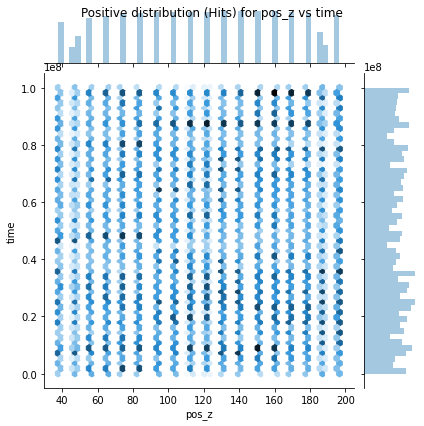

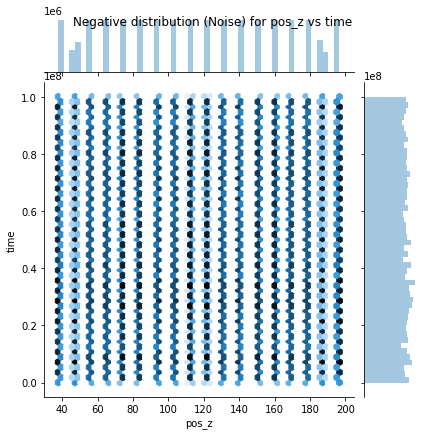

In [72]:
sns.jointplot(pos_df['pos_z'], pos_df['time'],
              kind='hex')
plt.suptitle("Positive distribution (Hits) for pos_z vs time")

sns.jointplot(neg_df['pos_z'], neg_df['time'],
              kind='hex')
_ = plt.suptitle("Negative distribution (Noise) for pos_z vs time")

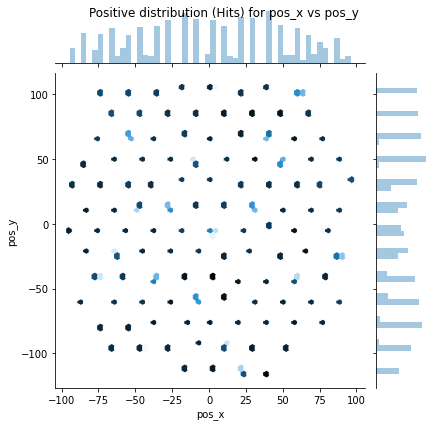

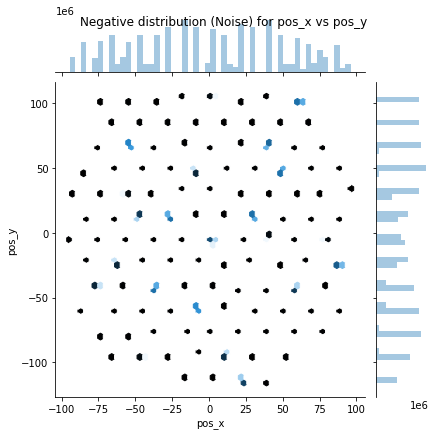

In [174]:
sns.jointplot(pos_df['pos_x'], pos_df['pos_y'],
              kind='hex')
plt.suptitle("Positive distribution (Hits) for pos_x vs pos_y")

sns.jointplot(neg_df['pos_x'], neg_df['pos_y'],
              kind='hex')
_ = plt.suptitle("Negative distribution (Noise) for pos_x vs pos_y")

#### End of Class Imbalance

In [175]:
list_mixed_groups = data_noise_hits.groupby('group')['label'].count().sort_values(ascending=False)[:200]

some_values = list_mixed_groups.to_frame().reset_index()['group']
data_subset = data_noise_hits.loc[data_noise_hits['group'].isin(some_values)]

pos_df = data_subset[data_subset.label == 1]
neg_df = data_subset[data_subset.label == 0]

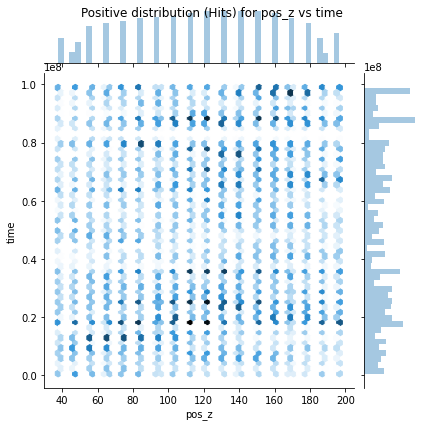

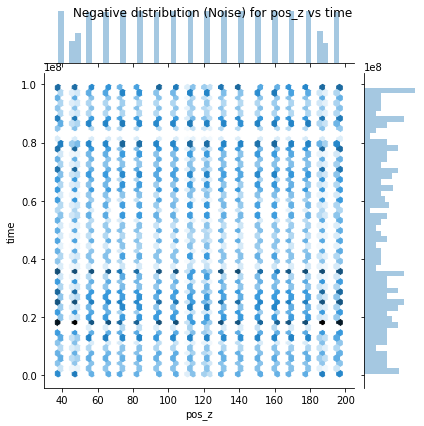

In [177]:
sns.jointplot(pos_df['pos_z'], pos_df['time'],
              kind='hex')
plt.suptitle("Positive distribution (Hits) for pos_z vs time")

sns.jointplot(neg_df['pos_z'], neg_df['time'],
              kind='hex')
_ = plt.suptitle("Negative distribution (Noise) for pos_z vs time")

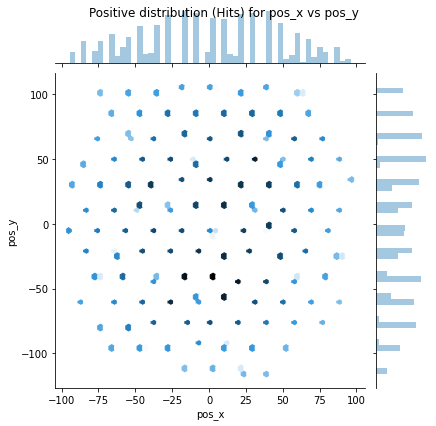

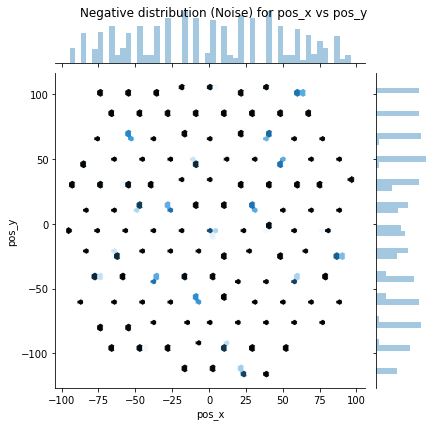

In [176]:
sns.jointplot(pos_df['pos_x'], pos_df['pos_y'],
              kind='hex')
plt.suptitle("Positive distribution (Hits) for pos_x vs pos_y")

sns.jointplot(neg_df['pos_x'], neg_df['pos_y'],
              kind='hex')
_ = plt.suptitle("Negative distribution (Noise) for pos_x vs pos_y")

In [ ]:
data_path = "../data/points/mixed/"
list_mixed_groups = list(list_mixed_groups.index)

for idx in list_mixed_groups:
    file_name = "group_"+str(idx)+".xyz"
    np.savetxt(data_path + file_name,
               data_noise_hits[data_noise_hits.group == idx][['pos_x', 'pos_y', 'pos_z']].values)
    
print("All {0} files saved successfully in {1}!".format(len(list_mixed_groups),
                                                        data_path))